
# Project: No-show Appointments Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**Who/What is to blame when a patient does not show for an appointment?**

>I shall analyse about 100k medical appointments data with 14 characteristics which are :
>
>> 1. PatientId : is the identification no. of each patient
>> 2. AppointmentID : is the identification no. of each appointment
>> 3. Gender : Male or Female. With Females in more proportions
>> 4. ScheduledDay : The day the patient called or registered the appointment
>> 5. AppointmentDay : The day when they have to see the doctor, attend the appointment.
>> 6. Age : How old the patient is
>> 7. Neighbourhood : Location where the appointment takes place
>> 8. Scholarship : Reads True/False for whether a patient is enrolled in Brasilian welfare program or not
>> 9. Hipertension : Reads True/False for a patients Hipertension's status
>> 10. Diabetes : Reads True/False for a patients Diabetes' status
>> 11. Alcoholism : Reads True/False for patients alcohol dependency
>> 12. Handcap : Reads True/False for a patients physical or mental disability status
>> 13. SMS_received : No. of appointment messages sent to the patient
>> 14. No-show : Read True/False for whether a patient makes the appointment or not

### Question(s) for Analysis
 **What features determine whether a patient will make their appointment or not?**

> * Does the number of communication(SMS) sent by the hospital lead to patients showing up for their appointment?

> * Does the disability of the patient affect their ability to show up for appointments?

> * Are patients of a certain age group more likely to show up more than other age groups? 



In [1]:
# import statements for all of the packages to be used
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling



### General Properties



In [2]:
# Loading my data and viewing 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.shape

(110527, 14)

from the above information we can see that our dataset has the following 110527 rows by 14 columns

In [3]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


a brief view of our dataset

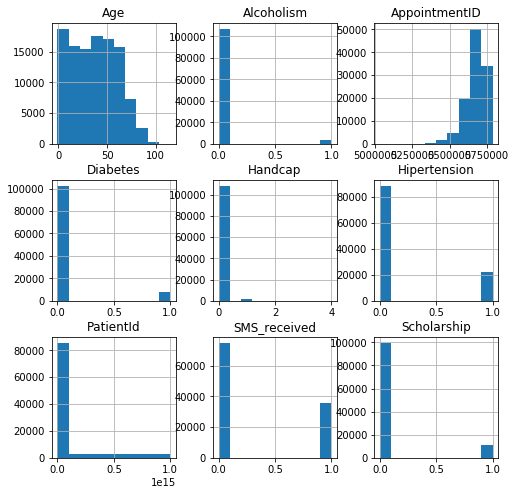

In [4]:
# Histogram/visualization of dataset
df.hist(figsize=(8,8));

above is a histogram of almost every column in the dataframe

In [5]:
#missing values in each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

the dataset has no missing values in any columns which makes our analysis easier as that means our dataset is complete

In [6]:
# duplicated rows in the dataset
df.duplicated().sum()

0

there are no duplicated rows in our dataset which also makes our data cleaning process easier

In [7]:
# datatypes of columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

above is our columns datatype, appointmentid and patientid have a mismatch which we'll have to fix later.

In [8]:
# unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The number of unique values in AppointmentDay is 27 which means that our data spans over about month of appointments 

In [9]:
# view the unique values in age column in ascending order
np.sort(df.Age.unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

The is a value of -1 which doesn't make sense as the is no person who can be negatively aged
lets find its count(how many patients) to see if it might typo

In [10]:
#the number of persons aged -1
df[df.Age== -1].shape[0]

1

The count is one which means it is an error, we will delete the record in the cleaning process.

In [11]:
# Age 0 means babies less than 12 months old
# to verify our assumtion we can check records of age 0 data with alcoholism since no babies can suffer from alcoholism
df[(df.Age <= 0) & (df.Alcoholism.astype(int)==1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


from above we can see that our assumption that age 0 is babies less than 12 months old because we have no record of age 0 and suffer alcoholism.

In [12]:
# view the age statistics in order to later create age groups
df.describe().Age

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

we can see that the mean age of our patients is around 37

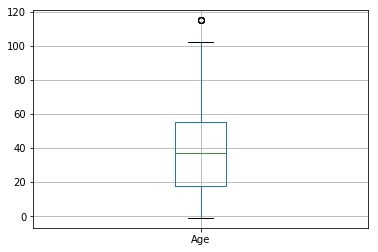

In [13]:
# box plot to visualize the above age statistics
df.boxplot(column=['Age']);

above is a boxplot for the age distribution

In [14]:
# Viewing the AppointmentDay and ScheduledDay columns
df[["AppointmentDay", "ScheduledDay"]]

,AppointmentDay,ScheduledDay
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z
5,2016-04-29T00:00:00Z,2016-04-27T08:36:51Z
6,2016-04-29T00:00:00Z,2016-04-27T15:05:12Z
7,2016-04-29T00:00:00Z,2016-04-27T15:39:58Z
8,2016-04-29T00:00:00Z,2016-04-29T08:02:16Z
9,2016-04-29T00:00:00Z,2016-04-27T12:48:25Z


The timestamp on the AppointmentDay is consistent as 00:00:00 which provides no help

The ScheduledDay has sometime timestamp but it really doesn't matter much as the AppointmentDay one would have

so we can just remove the timestamp on both columns


### Data Cleaning
 

In [15]:
# Renaming columns with spelling errors in the dataset
df= df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'})

# Renaming columns to make sure the seperation of column name is consistent
df= df.rename(columns={'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


a view of our dataset with renamed columns

In [16]:
# Removing timestamps from ScheduledDay and AppointmentDay
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


we have removed the timestamp from ScheduledDay as it served no use in our analysis

In [17]:
## Fixing datatypes

# Convert PatientId datatype from float to int64 to match AppointmentId
df['PatientId'] =df['PatientId'].astype('int')

# Convert ScheduledDay and AppointmentDay from object to datetime64
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64[ns]')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64[ns]')

# Converting columns with unique values less than 10 from integers to objects
df['Handicap'] = df['Handicap'].astype('object')
df['Scholarship'] = df['Scholarship'].astype('object')
df['Hypertension'] = df['Hypertension'].astype('object')
df['Alcoholism'] = df['Alcoholism'].astype('object')
df['Diabetes'] = df['Diabetes'].astype('object')
df['SMSReceived'] = df['SMSReceived'].astype('object')

# checkpoint
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null object
Hypertension      110527 non-null object
Diabetes          110527 non-null object
Alcoholism        110527 non-null object
Handicap          110527 non-null object
SMSReceived       110527 non-null object
NoShow            110527 non-null object
dtypes: datetime64[ns](2), int64(3), object(9)
memory usage: 11.8+ MB


our new appropriate column datatypes

In [18]:
# Delete the error in age entries
df = df[df.Age >= 0]
np.sort(df.Age.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

the entries of Age with the error removed

In [19]:
## to make my dataset a lot more clean and reduce the independent viariables I will drop columns PatientId and AppointmentId as they do not offer any useful insight
df.drop(['AppointmentID', 'PatientId'], axis= 1, inplace= True)

#final checkpoint
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


our new dataset after removing non-essential data like the appointment and patient ID columns

<a id='eda'></a>
## Exploratory Data Analysis


### Does the no. of SMS sent by the hospitals lead to patients showing up for their appointment?


In [20]:
#define the ratio of SMS received and no SMS received by patients
df_sms_ratio = df.query('NoShow== "No"').groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()

The above cell defines my sms ratio for the analysis

In [28]:
print("Ratio Of SMSReceived And No SMSReceived\n")
print(df_sms_ratio*100)

Ratio Of SMSReceived And No SMSReceived

SMSReceived
0    83.296466
1    72.425455
dtype: float64


The percentage of communication received and no communication recieved

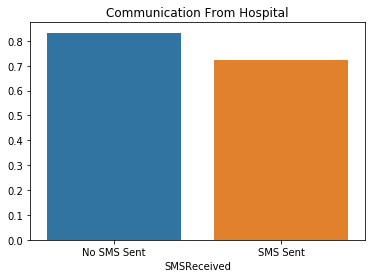

In [22]:
# Plot above ratio
sms = sns.barplot(x= df_sms_ratio.index , y= df_sms_ratio)
x_ticks_labels = ['No SMS Sent', 'SMS Sent']
sms.set_xticklabels(x_ticks_labels)
sms.set_title('Communication From Hospital')
plt.show()

The  number of patients who show up despite not receiving communication from the hospital is about 10% higher than the ones who received communication which is the inverse of what we might expect to observe. Receiving reminders usually encourages a person's attendance.


### Does the disability of the patient affect their ability to show up for appointments?

In [24]:
#Defining the handicap ratio
df_handicap_ratio = df[df.NoShow== 'Yes'].groupby(['Handicap']).size()/df.groupby(['Handicap']).size()

the above cell describe the function of handicap ratio to compare their show/noshow

In [27]:
print("Levels Of Handicap & NoShow Percentage\n")
print(df_handicap_ratio*100)

Levels Of Handicap & NoShow Percentage

Handicap
0    20.235490
1    17.923604
2    20.218579
3    23.076923
4    33.333333
dtype: float64


the percentage of NoShow of patients with different levels of disabilities.

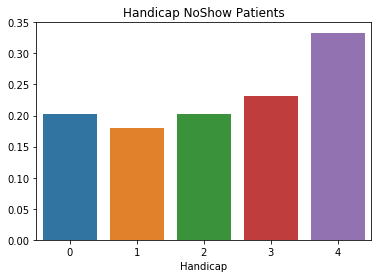

In [29]:
# Bar plot for disability factor
handicap = sns.barplot(x= df_handicap_ratio.index, y= df_handicap_ratio)
handicap.set_title('Handicap NoShow Patients')
plt.show()

It seems like the number of NoShow generally increases as the level of handicap increases which might mean that the disability range of a person does affect their ability to show up for appointments, this could be due to lack of access to disability-friendly transport to and at the hospital.

### Are patients of certain age group more likely to show up more than other age groups?

In [30]:
#creating age groups
bins= [0, 11, 24,54, 74, np.inf]
labels =['Children', 'Youth', 'Young Adult', 'Senior Adult', 'Elderly']
df['age_groups'] = pd.cut(df['Age'], bins=bins, labels=labels)

df_age_groups_ratio= df.query('NoShow== "No"').groupby(['age_groups']).size()/df.groupby(['age_groups']).size()


Created and Defined age groups and their ratios.

In [32]:
print("Different Age Groups of Patients Who Show UP\n")
print(df_age_groups_ratio*100)

Different Age Groups of Patients Who Show UP

age_groups
Children        79.298994
Youth           74.421290
Young Adult     79.036770
Senior Adult    84.303919
Elderly         83.979111
dtype: float64


The percentage of the various age groups who showed up for their appointments

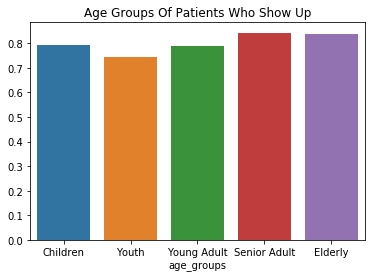

In [33]:
#Plotting the Age group ratios
age_groups = sns.barplot(x= df_age_groups_ratio.index, y=df_age_groups_ratio)
age_groups.set_title('Age Groups Of Patients Who Show Up')
plt.show()

The number of patients who show up according to the grouped ages seems to be generally the same with a slight drop seen in the youth group which makes sense because the youth tends to be sick less compared to the other groups and the immune sytem is at its peak years, so less youth would even make appointments.

### Overall Number of Patients who showed up and those who did not show up

In [34]:
df.groupby(['NoShow']).size()

NoShow
No     88207
Yes    22319
dtype: int64

from above we can see that more patients showed up for their appointments

In [35]:
#percentage of no show
df_noshow = 22319/ (88207+22319)
print(df_noshow*100)

20.193438647919944


About 20% of patients who booked appointments did not show up 

In [36]:
df_show = 88207/ (88207+22319)
print(df_show*100)

79.80656135208005


About 80% of the patients showed up for their appointments

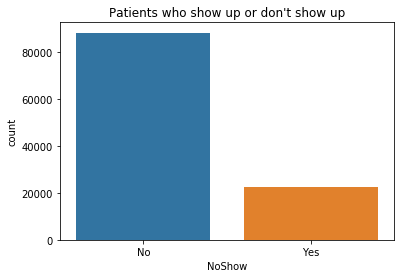

In [37]:
#the plot of Overall Patients Who Showed or Did Not
show_noshow = sns.countplot(x=df.NoShow)
show_noshow.set_title("Patients who show up or don't show up")
plt.show()

The count plot from the dataset of patients who show up and those who did not show up

<a id='conclusions'></a>
## Conclusions
> ### Results : 
> As seen from our analysis, we cannot use the age group of the patients to predict whether a patient will show up or not. The number of sms sent out by the hospital has a negative effect on patients showing up. Handicap can be used to predict Show/NoShow of patients.As shown in the analysis, more handicap people do not show up. The overall percentage of patients showing up in hospitals for their appointments is 80% which is good for a month's data.

>### Limitations :
> We were working with about a month of AppointmentDay data, which is not enough to make conclusive analysis and predictions. It is only a snapshot and does not paint the whole picture of the Show/NoShow of the Hospital's Appointments  
>We were not given the reason for consultation appointment, this would have made our analysis more clearer and helped in predicting a Show/NoShow. This is because the seriousness of the illness is more to encourage a patient to consult than most of the other features.


In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0